# Processing Loan Data

### Loading data

In [60]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [61]:
# reading file in and storing the information in a dataframe 
df = pd.read_csv('Loan_Data.csv')

# display few row of the dataframe
df.head()

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,...,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,...,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,...,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,...,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0


In [62]:
# The Pandas len() function returns the length of a dataframe 
# The safest way to determine the number of rows in a dataframe 
# is to count the length of the dataframe’s index.

print(f"Lenght of dataframe using len():  {len(df.index)} ")

print(f"Lenght of dataframe using shape[0]: {df.shape[0]}")



# The Pandas .count() method is the  slowest method of the three methods listed here.
# The .shape attribute and the len() function are vectorized and take the same length
# of time regardless of how large a dataframe is. 
# The .count() method takes significantly longer with with larger dataframes. 

print(f"Lenght of dataframe using count(): {df.count()[0]}")


Lenght of dataframe using len():  148670 
Lenght of dataframe using shape[0]: 148670
Lenght of dataframe using count(): 148670


In [63]:
# the the feature information
# important look at the Non-Null count and the Dtype

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         148670 non-null  int64  
 1   year                       148670 non-null  int64  
 2   loan_limit                 145326 non-null  object 
 3   Gender                     148670 non-null  object 
 4   approv_in_adv              147762 non-null  object 
 5   loan_type                  148670 non-null  object 
 6   loan_purpose               148536 non-null  object 
 7   Credit_Worthiness          148670 non-null  object 
 8   open_credit                148670 non-null  object 
 9   business_or_commercial     148670 non-null  object 
 10  loan_amount                148670 non-null  int64  
 11  rate_of_interest           112231 non-null  float64
 12  Interest_rate_spread       112031 non-null  float64
 13  Upfront_charges            10

### Features


Features

*   ID = Customer ID of Applicant
*   year = Year of Application
*   loan limit = maximum avaliable amount of the loan allowed to be taken
*    Gender = sex type
*    approv_in_adv = Is loan pre-approved or not
*    loan_type = Type of loan
*    loan_purpose = the reason you want to borrow money
*    Credit_Worthiness = is how a lender determines that you will default on your debt obligations, or how worthy you are to receive new credit.
*    open_credit = is a pre-approved loan between a lender and a borrower. It allows the borrower to make repeated withdrawals up to a certain limit.
*    business_or_commercial = Usage type of the loan amount
*    loan_amount = The exact loan amount
*    rate_of_interest = is the amount a lender charges a borrower and is a percentage of the principal—the amount loaned.
*    interest_rate_spread = the difference between the interest rate a financial institution pays to depositors and the interest rate it receives from loans
*    upfront_charges = Fee paid to a lender by a borrower as consideration for making a new loan
*    term = the loan's repayment period
*    neg_ammortization = refers to a situation when a loan borrower makes a payment less than the standard installment set by the bank.
*    interest_only = amount of interest only without principles
*    lump_sum_payment = is an amount of money that is paid in one single payment rather than in installments.
*    property_value = the present worth of future benefits arising from the ownership of the property
*    construction_type = Collateral construction type
*    occupancy_type = classifications refer to categorizing structures based on their usage
*    secured_by = Type of Collatoral
*    total_units = number of unites
*    income = refers to the amount of money, property, and other transfers of value received over a set period of time
*    credit_type = type of credit
*    co-applicant_credit_type = is an additional person involved in the loan application process. Both applicant and co-applicant apply and sign for the loan
*    age = applicant's age
*    submission_of_application = Ensure the application is complete or not
*    LTV = life-time value (LTV) is a prognostication of the net profit
*    region = applicant's place
*    security_type = Type of Collatoral
*    status = Loan status (Approved/Declined)
*    dtir1 = debt-to-income ratio



### Data Preprocessing

Let us visualize the missing data of our dataframe

In [64]:
# if you get an error like this -> ModuleNotFoundError: No module named 'missingno'

# you my need to run -> pip install missingno
# in the terminal

import missingno as msno

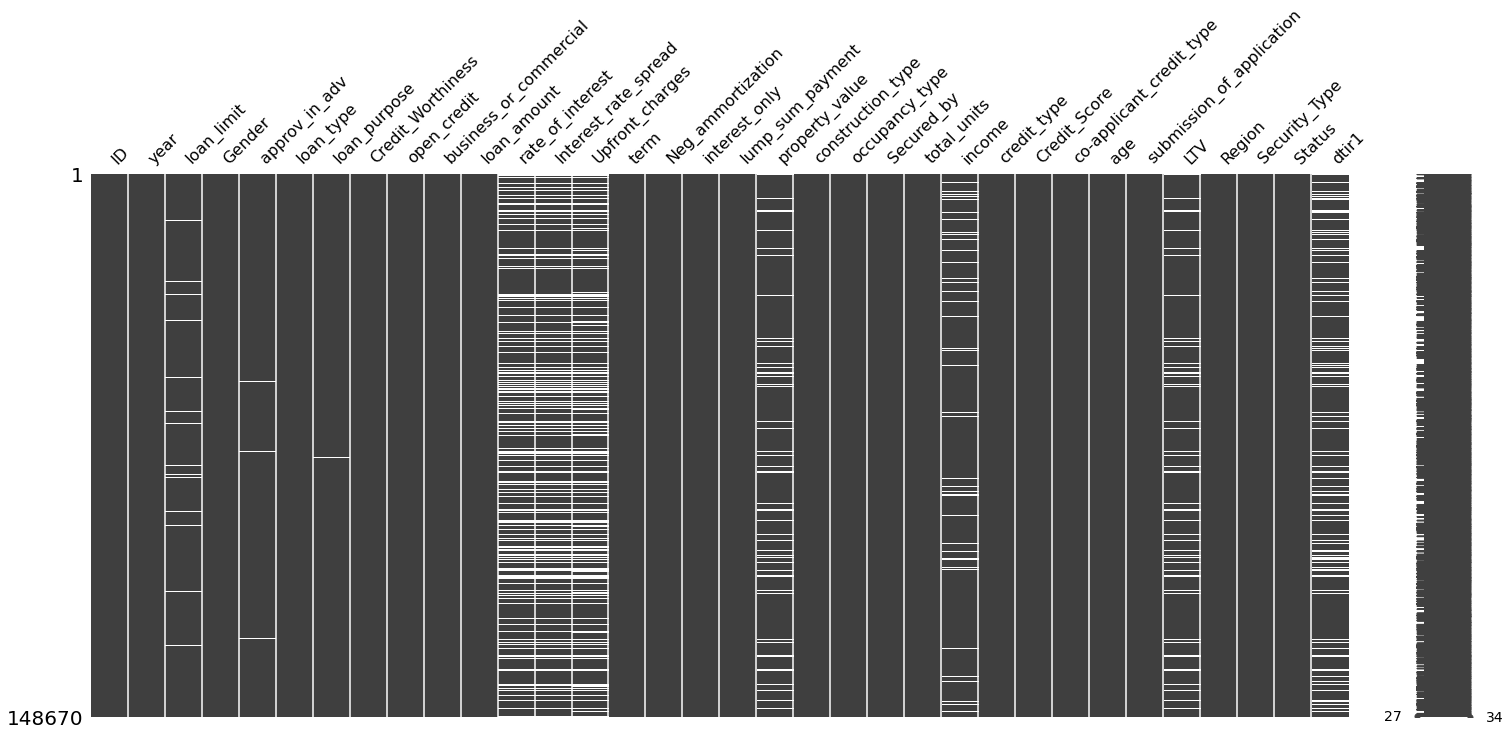

<Figure size 1080x648 with 0 Axes>

In [65]:
msno.matrix(df)
plt.figure(figsize = (15,9))
plt.show()

In [66]:
# getting the features (columns) with missing values
columns_with_missing_data = [col for col in df.columns if df[col].isnull().sum() > 0]
columns_with_missing_data

['loan_limit',
 'approv_in_adv',
 'loan_purpose',
 'rate_of_interest',
 'Interest_rate_spread',
 'Upfront_charges',
 'term',
 'Neg_ammortization',
 'property_value',
 'income',
 'age',
 'submission_of_application',
 'LTV',
 'dtir1']

Let us look at the correlation matrix using a heatmap

<AxesSubplot:>

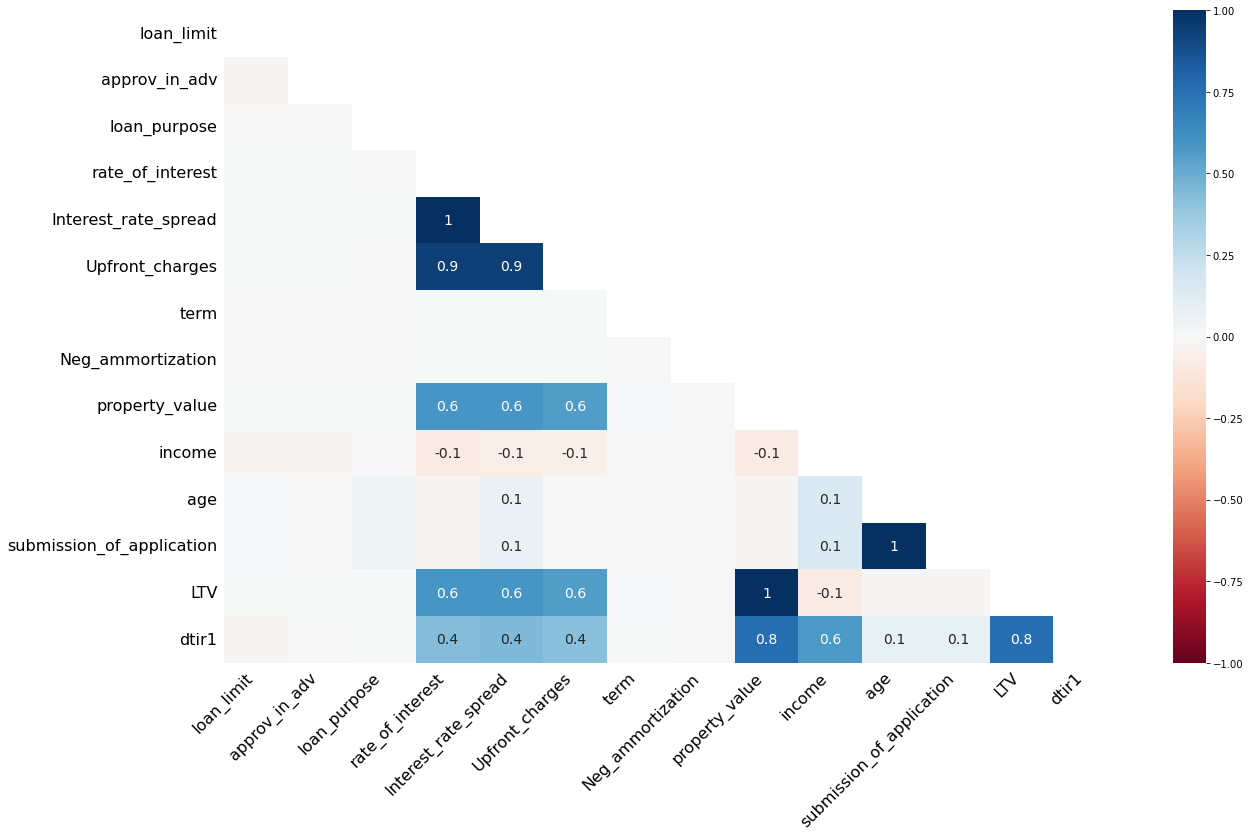

In [67]:
msno.heatmap(df, labels = True)

#### Dendrogram

A dendrogram is a diagram that shows the hierarchical relationship between objects. It is most commonly created as an output from hierarchical clustering. 

The dendrogram is a summary of the distance matrix. For example, the dendrogram suggests that C and D are much closer to each other than is C to B.

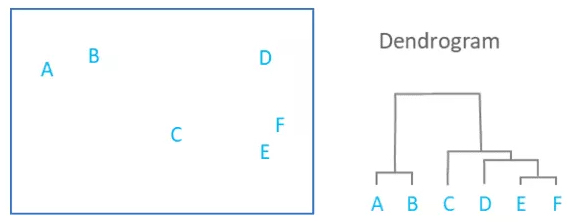

<AxesSubplot:>

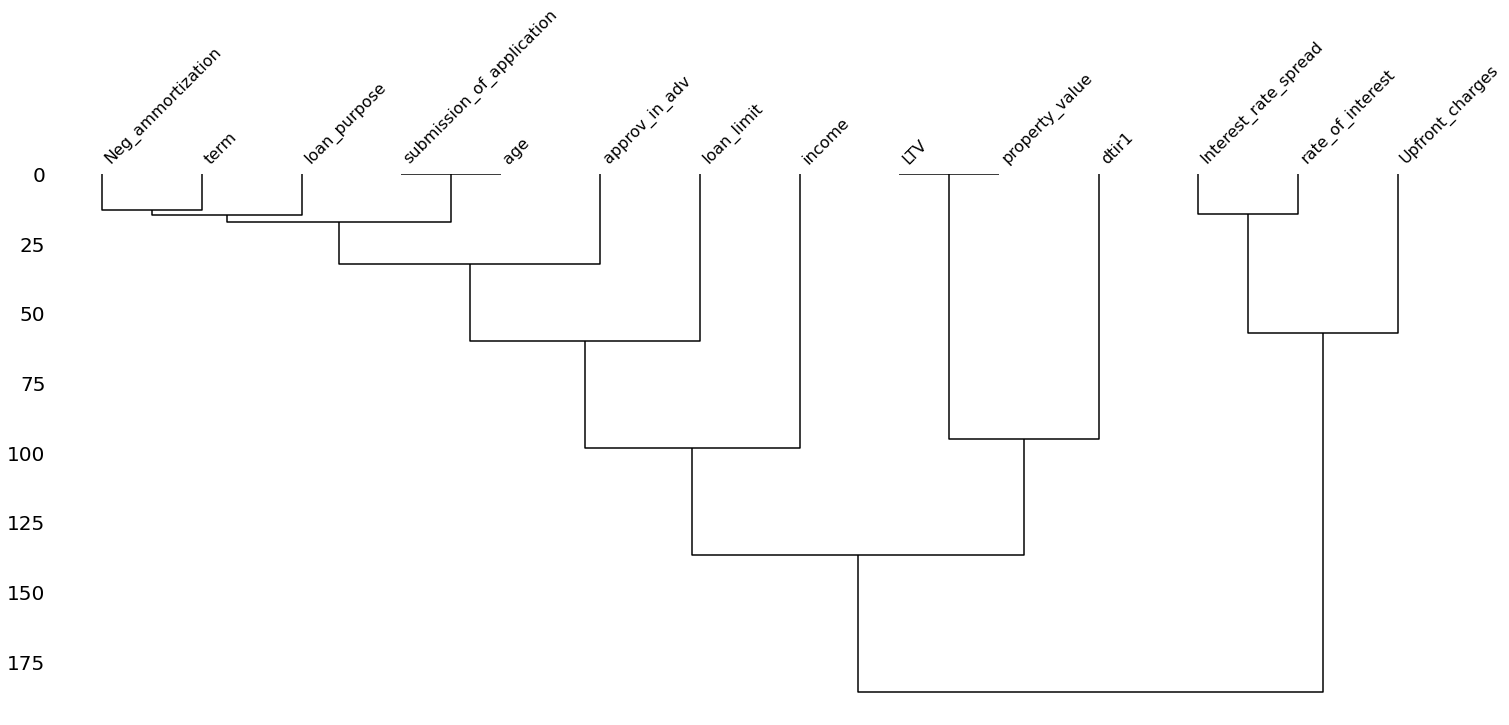

In [68]:
msno.dendrogram(df[columns_with_missing_data])

#### Data Report 

In [69]:
def get_numerical_summary(df):
    total = df.shape[0]
    columns_with_missing_data = [col for col in df.columns if df[col].isnull().sum() > 0]
    missing_percent = {}

    for col in columns_with_missing_data:
        null_count = df[col].isnull().sum()
        per = (null_count/total) * 100
        missing_percent[col] = per
        print("{} : {} ({}%)".format(col, null_count, round(per, 3)))
    return missing_percent

In [70]:
missing_percent = get_numerical_summary(df)

loan_limit : 3344 (2.249%)
approv_in_adv : 908 (0.611%)
loan_purpose : 134 (0.09%)
rate_of_interest : 36439 (24.51%)
Interest_rate_spread : 36639 (24.645%)
Upfront_charges : 39642 (26.664%)
term : 41 (0.028%)
Neg_ammortization : 121 (0.081%)
property_value : 15098 (10.155%)
income : 9150 (6.155%)
age : 200 (0.135%)
submission_of_application : 200 (0.135%)
LTV : 15098 (10.155%)
dtir1 : 24121 (16.225%)


#### Some ideas on how to handle missing data 

How should we deal with features that I have missing data? 

Do we just delete the row or do we delete the whole entire feature all together. Here are some thoughts on this:

* Let R = Number of rows
* Let F = Number of Features

Case 1: Deletion of Feature

If F has range of [1-10] then don't delete the feature that contain missing values but if that feature has missing values around 80-90% then deletion of that attribute will be good option instead of just predicting values of those 80-90% data based on that 10-20% data.

Case 2: Deletion of Row

If R is a large number according to your task then deletion of row can be a good step, but if that row has few missing values with respect to feature, then you should consider methods to fill those missing values.


* From  report above ->  all feature look OK

##### Here's an illustration how to automate the process of deleting features

In [71]:
def drop_feature(data_frame, threshold):
    
    for col, per in missing_percent.items():
        if per > threshold:
            data_frame.drop(col, axis = 1, inplace = True)
            
    return data_frame

In [72]:
df2 = drop_feature(df.copy(), 20)

_ = get_numerical_summary(df2)

loan_limit : 3344 (2.249%)
approv_in_adv : 908 (0.611%)
loan_purpose : 134 (0.09%)
term : 41 (0.028%)
Neg_ammortization : 121 (0.081%)
property_value : 15098 (10.155%)
income : 9150 (6.155%)
age : 200 (0.135%)
submission_of_application : 200 (0.135%)
LTV : 15098 (10.155%)
dtir1 : 24121 (16.225%)


In [73]:
_ = get_numerical_summary(df)

loan_limit : 3344 (2.249%)
approv_in_adv : 908 (0.611%)
loan_purpose : 134 (0.09%)
rate_of_interest : 36439 (24.51%)
Interest_rate_spread : 36639 (24.645%)
Upfront_charges : 39642 (26.664%)
term : 41 (0.028%)
Neg_ammortization : 121 (0.081%)
property_value : 15098 (10.155%)
income : 9150 (6.155%)
age : 200 (0.135%)
submission_of_application : 200 (0.135%)
LTV : 15098 (10.155%)
dtir1 : 24121 (16.225%)


##### Here's an illustration how to automate the process of deleting rows

In [74]:
# delete rows with missing values in greater than threshold

def drop_row(df, threshold):
    # Getting Missing count of each sample            
    for idx in range(df.shape[0]):
        df.loc[idx, 'missing_count'] = df.iloc[idx, :].isnull().sum()  

    
    df.drop(df[df['missing_count'] > threshold].index, axis = 0, inplace = True)
   
    return df

In [75]:
print("Samples Before Removal : {}".format(df2.shape[0]))

# this can take some time... depand on the shape of the dataframe
df2 = drop_row(df2, 2)

print("Samples After Removal : {}".format(df2.shape[0]))

Samples Before Removal : 148670
Samples After Removal : 124546


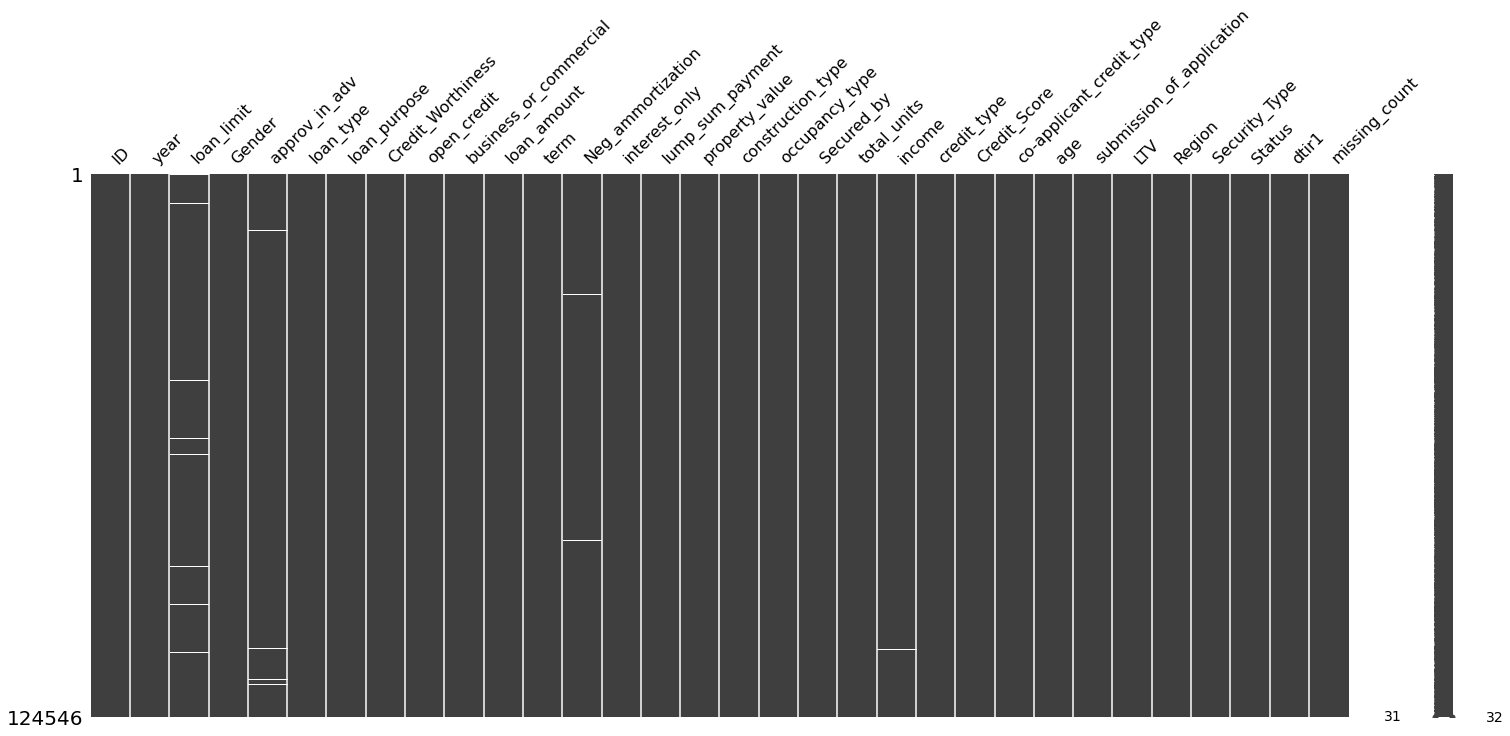

<Figure size 1080x648 with 0 Axes>

In [76]:
msno.matrix(df2)
plt.figure(figsize = (15,9))
plt.show()

In [77]:
print(f"Lenght of dataframe using len():  {len(df2.index)} ")

Lenght of dataframe using len():  124546 


In [78]:
# getting the features (columns) with missing values
columns_with_missing_data = [col for col in df2.columns if df2[col].isnull().sum() > 0]
columns_with_missing_data

['loan_limit',
 'approv_in_adv',
 'loan_purpose',
 'term',
 'Neg_ammortization',
 'income']

#### Encoding missing values -> with fillna 

In [79]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 124546 entries, 0 to 148669
Data columns (total 32 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         124546 non-null  int64  
 1   year                       124546 non-null  int64  
 2   loan_limit                 121665 non-null  object 
 3   Gender                     124546 non-null  object 
 4   approv_in_adv              123766 non-null  object 
 5   loan_type                  124546 non-null  object 
 6   loan_purpose               124437 non-null  object 
 7   Credit_Worthiness          124546 non-null  object 
 8   open_credit                124546 non-null  object 
 9   business_or_commercial     124546 non-null  object 
 10  loan_amount                124546 non-null  int64  
 11  term                       124517 non-null  float64
 12  Neg_ammortization          124434 non-null  object 
 13  interest_only              12

In [80]:
cat_missing_cols = [col for col in columns_with_missing_data if df2[col].dtype == 'object']
cat_missing_cols

['loan_limit', 'approv_in_adv', 'loan_purpose', 'Neg_ammortization']

In [81]:
df2[cat_missing_cols] = df2[cat_missing_cols].fillna('Missing')
df2.loan_limit.value_counts()

cf         113755
ncf          7910
Missing      2881
Name: loan_limit, dtype: int64

In [82]:
df2[cat_missing_cols].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 124546 entries, 0 to 148669
Data columns (total 4 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   loan_limit         124546 non-null  object
 1   approv_in_adv      124546 non-null  object
 2   loan_purpose       124546 non-null  object
 3   Neg_ammortization  124546 non-null  object
dtypes: object(4)
memory usage: 4.8+ MB


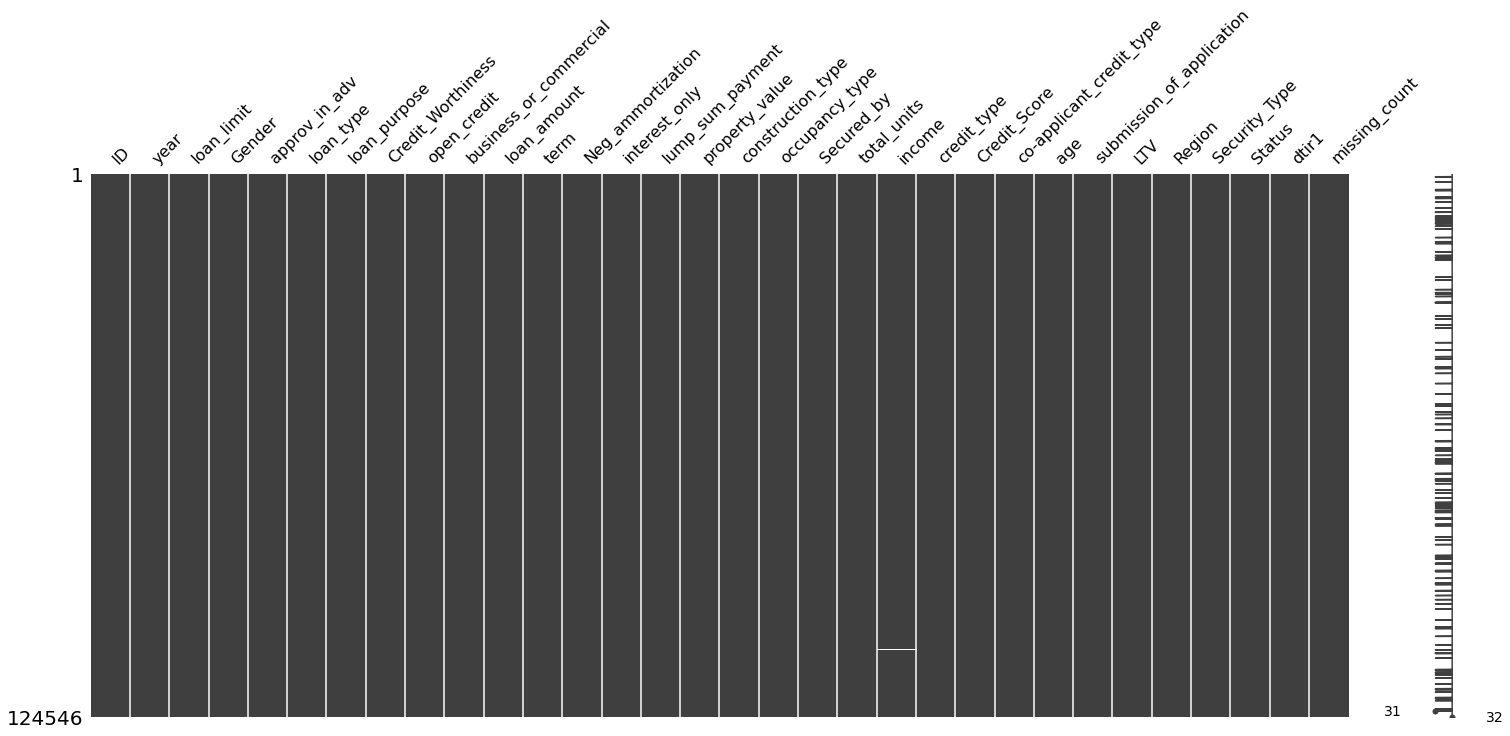

<Figure size 1080x648 with 0 Axes>

In [83]:
msno.matrix(df2)
plt.figure(figsize = (15,9))
plt.show()

####  K-Nearest Neighbors(KNN) for Imputation

In [84]:
df3 = df.copy()
num_cols = [col for col in df3.columns if df3[col].dtype == 'object']
print(num_cols)
df4 = df3[num_cols]

['loan_limit', 'Gender', 'approv_in_adv', 'loan_type', 'loan_purpose', 'Credit_Worthiness', 'open_credit', 'business_or_commercial', 'Neg_ammortization', 'interest_only', 'lump_sum_payment', 'construction_type', 'occupancy_type', 'Secured_by', 'total_units', 'credit_type', 'co-applicant_credit_type', 'age', 'submission_of_application', 'Region', 'Security_Type']


In [85]:
df4.head()

,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,Neg_ammortization,interest_only,...,construction_type,occupancy_type,Secured_by,total_units,credit_type,co-applicant_credit_type,age,submission_of_application,Region,Security_Type
0,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,not_neg,not_int,...,sb,pr,home,1U,EXP,CIB,25-34,to_inst,south,direct
1,cf,Male,nopre,type2,p1,l1,nopc,b/c,not_neg,not_int,...,sb,pr,home,1U,EQUI,EXP,55-64,to_inst,North,direct
2,cf,Male,pre,type1,p1,l1,nopc,nob/c,neg_amm,not_int,...,sb,pr,home,1U,EXP,CIB,35-44,to_inst,south,direct
3,cf,Male,nopre,type1,p4,l1,nopc,nob/c,not_neg,not_int,...,sb,pr,home,1U,EXP,CIB,45-54,not_inst,North,direct
4,cf,Joint,pre,type1,p1,l1,nopc,nob/c,not_neg,not_int,...,sb,pr,home,1U,CRIF,EXP,25-34,not_inst,North,direct


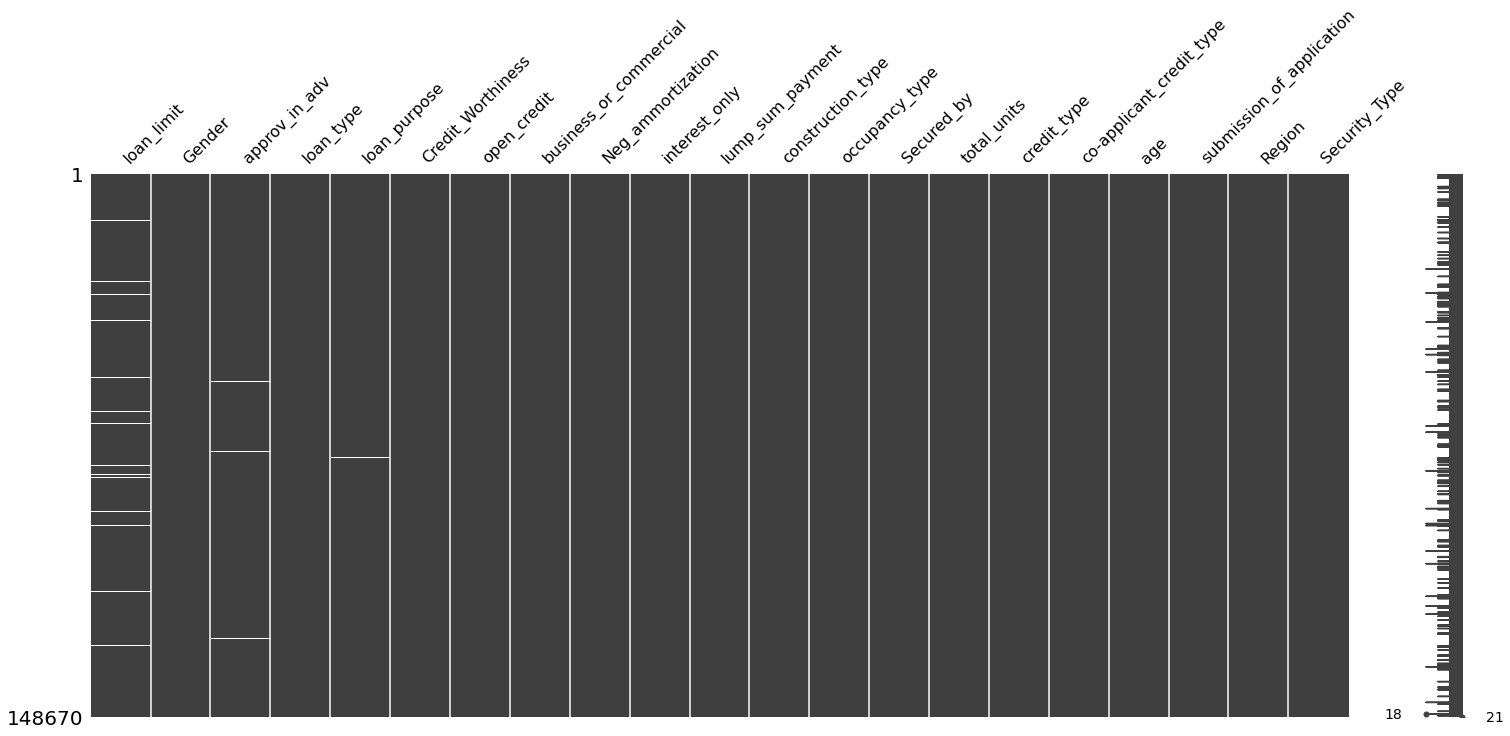

<Figure size 1080x648 with 0 Axes>

In [86]:
msno.matrix(df4)
plt.figure(figsize = (15,9))
plt.show()

In [87]:
# import need 
from sklearn.impute import KNNImputer

In [88]:
# Initializing KNNImputer
knn = KNNImputer(n_neighbors = 3)

knn.fit(df4)

ValueError: could not convert string to float: 'cf'

In [ ]:
# this takes a long time 
X = knn.transform(df4)

In [ ]:
df4 = pd.DataFrame(X, columns = num_cols)
df4.info()

In [ ]:
msno.matrix(df4)
plt.figure(figsize = (15,9))
plt.show()

In [ ]:
df5 = df4.join(df3[df3.columns.difference(df4.columns)])

In [ ]:
msno.matrix(df5)
plt.figure(figsize = (15,9))
plt.show()

In [ ]:
df5.head()

#### Decision Tree Regressor

In [ ]:
df6 = df.copy()

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import LabelEncoder


lb = LabelEncoder()

cat_cols = [col for col in df6.columns if df6[col].dtype == 'object']

for col in cat_cols:
    df6[col] = lb.fit_transform(df6[col])

In [ ]:
df6.head()

In [ ]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor


def tree_imputation(df):
    missing_cols = [col for col in df.columns if df[col].isnull().sum() > 0]
    non_missing_cols = [col for col in df.columns if df[col].isnull().sum() == 0]
    # num_cols = [col for col in missing_cols if df[col].dtype != 'object']

    # df = df[num_cols]
    for col in missing_cols:

        # Defining a new bagging model for each attribute  
        model = BaggingRegressor(DecisionTreeRegressor(), n_estimators = 40, max_samples = 1.0, max_features = 1.0, bootstrap = False, n_jobs = -1)

        col_missing = df[df[col].isnull()]
        temp = df.drop(df[df[col].isnull()].index, axis = 0)

        # print(temp.columns)
        # X = temp.drop(col, axis = 1)
        X = temp.loc[:, non_missing_cols]
        y = temp[col]

        model.fit(X, y)

        y_pred = model.predict(col_missing[non_missing_cols])
        # col_missing[col] = y_pred

        df.loc[col_missing.index, col] = y_pred
        
    return df
    

In [ ]:
# this takes some time
df7 = tree_imputation(df6)
df7.info()

In [ ]:
df7.head()

In [ ]:
msno.matrix(df7)
plt.show()

In [ ]:
df8 = pd.concat([df[cat_cols], df7.drop(cat_cols, axis = 1)], axis = 1)
df8.head()

In [ ]:
msno.matrix(df8)
plt.show()

In [ ]:
print("Samples Before Removal : {}".format(df8.shape[0]))

# this takes some time
df9 = drop_row(df8, 1)

print("Samples After Removal : {}".format(df9.shape[0]))

In [ ]:
msno.matrix(df9)
plt.show()

In [ ]:
df9.head()

#### Likelihood Encoding

In [ ]:
df10 = df.copy()
msno.matrix(df10)
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder




## Again we have to temporarily encode variables
lb = LabelEncoder()

cat_cols = [col for col in df10.columns if df10[col].dtype == 'object']

for col in cat_cols:
    df10[col] = lb.fit_transform(df10[col])

In [ ]:
df10.head()

In [ ]:
def likelihood_encoding(df, cat_cols, target_variable = "Status"):
    # cat_cols.remove(target_variable)
    df_temp = df.copy()
    for col in cat_cols:
        effect = {}
        print(col)
        for category in df[col].unique():
            print(category)

            try:
                temp = df[df[col] == category]
                lr = LogisticRegression()
                X = temp.drop(target_variable, axis = 1, inplace = False)
                y = temp[target_variable]
                # print(temp.drop(target_variable, axis = 1).isnull().sum())
                lr.fit(X, y)

                effect[category] = accuracy_score(y, lr.predict(X))
            except Exception as E:
                print(E)
        
        for key, value in effect.items():
            effect[key] = np.log(effect[key] / (1 - effect[key] + 1e-6))
            
        df_temp.loc[:, col] = df_temp.loc[:, col].map(effect)
    return df_temp


In [ ]:


df11 = likelihood_encoding(df10, cat_cols)
df11.head()


In [ ]:
df11.info()

In [ ]:
msno.matrix(df11)
plt.show()

In [ ]:
df12 = pd.concat([df[cat_cols], df11.drop(cat_cols, axis = 1)], axis = 1)
df12.head()

In [ ]:
msno.matrix(df12)
plt.show()

In [ ]:
#df2 = drop_feature(df.copy(), 20)

_ = get_numerical_summary(df12)

In [ ]:
df13 = drop_row(df12, 1)

In [ ]:
df13.info()

In [ ]:
msno.matrix(df13)
plt.show()